# Linear least squares

I wrote this whilst trying to get the demo in [Demonstration on 6x6 images](Demonstration on 6x6 images.ipynb) working.  First I tried some simple data in [play_likelihood](play_likelihood.ipynb), but it didnt get me very far.  So, I decided to try to improve my knowledge of linear algebra a bit, and this notebook summarizes approximately my path through the maze of linear algebra.

What am I trying to do/understand here?

For the IBP, Thomas Griffiths says:

"This result is intuitive: the exponentiated term is the difference between the inner product matrix of the raw values of X and their projections onto the space spanned by Z, regularized to an extent determined by the ratio of the variance of the noise in X to the variance of the prior on A. This is simply the marginal likelihood for a Bayesian linear regression model (Minka, 2000)."

But it's not intuitive to me :-P  And also the results I get from trying to run IBP myself kind of suck.  How to go further?  I think trying to understand Griffith's statement might be useful; and trying to get some insight into projections, column spans, linear least squares etc, seems like a useful pre-requisite for this?

There are three sections in this notebook:

- outline of the book "Linear Algebra" by Jim Hefferon.  URL to the book
- notes on Wikipedia, numerica/computational capacity of computing the line of best fit using the inverse, Cholesky, and QR decomposiition
- my attempts at visualizing linear least squares as projection.  I think I somewhat succeed at this bit.  It certainly gave me the feeling of "insight" I was looking for.

## "Linear Algebra", by Jim Hefferon

I googled a bit, and found the book "Linear Algebra" by Jim Hefferon.  I think it's great!  It's also available online, at [http://joshua.smcvt.edu/linearalgebra/](http://joshua.smcvt.edu/linearalgebra/).

I read the following chapters:

- skimmed "linear systems"
- all of 'vector spaces'
- all of 'maps between spaces'

In my opinion Jim Hefferon's book is very well written, very clear.  It has tons of examples and exercises.  I'm pretty sure there is nothing I can, or need, to add to it.  So, I'm just going to reference it here, and assume that from here on, you've either read it, and understood it, or already know about the concepts and definitions that he goes through.

Having read through his book, I read his chapter on line of best fit.  And re-read it.  And re-re-read it.  And still couldnt quite see how the projection was working.  I wanted to be able to 'visualize' it somehow, not just write down formulae, and couldnt quite see how to do that.

I turned to Wikipedia, flush in the knowledge that now I knew at least what a map is, and how to do high-dimensional projection, and looked through some of the ideas there:

## Notes from wikipedia

https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Properties_of_the_least-squares_estimators

Overdetermined system:

$$
\sum_{j=1}^n X_{ij}\beta_j = y_i, (i=1,2,\dots,m)
$$

where:

- $n$ is number of parameters
- $m$ is number of data points
- $m > n$

In matrix form:

$$
\mathbf{X}\mathbf{\beta} = \mathbf{y}
$$

This has no solution, so we find the best solution by solving the quadratic minimization problem:

$$
\hat{\mathbf{\beta}} = \mathrm{argmin}_{\beta}S(\mathbf{\beta})
$$

where objective function $S$ is given by:

$$
S(\beta) = \sum_{i=1}^m \lvert y_i-\sum_{j=1}^nX_{ij}\beta_j \rvert^2 = ||\mathbf{y} - \mathbf{X}\mathbf{\beta}||^2
$$

Solution is unique, and is the solution of the normal equations:

$$
(\mathbf{X}^T\mathbf{X})\mathbf{\hat{\beta}} = \mathbf{X}^T \mathbf{y}
$$
&nbsp;

$$
S(\mathbf{\beta}) = ||\mathbf{y} - \mathbf{X}\mathbf{\beta}||^2
$$
&nbsp;

$$
=(\mathbf{y} - \mathbf{X}\mathbf{\beta})^T(\mathbf{y} - \mathbf{X}\mathbf{\beta})
$$
&nbsp;

$$
=\mathbf{y}^T\mathbf{y} - 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{y} + \mathbf{\beta}^T\mathbf{X}^T\mathbf{X}\mathbf{\beta}
$$

Differentiate wrt $\mathbf{\beta}$, and set equal to 0:

$$
= -2\mathbf{X}^T\mathbf{y} + \mathbf{X}^T\mathbf{X}\mathbf{\beta} = 0
$$

### Inverting the matrix of the normal equations

The algebraic solution of the normal equations can be written as

$$
\mathbf{\hat{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$
&nbsp;

$$
=\mathbf{X}^+\mathbf{y}
$$

.... where $\mathbf{X}^+$ is the Moore-Penrose pseudoinverse of $\mathbf{X}$.

Using Cholesky decomposition:

$$
\mathbf{R}^T\mathbf{R}\mathbf{\hat{\beta}} = \mathbf{X}^T\mathbf{y}
$$

First solve for $\mathbf{R}^\mathbf{\hat{\beta}}$

Then solve for $\mathbf{\beta}$

### Orthogonal decomposition methods

Write out the residuals:

$$
\mathbf{r} = \mathbf{y} - \mathbf{X}\mathbf{\hat{\beta}}
$$

#### Interlude: Gramian matrix

A set of vectors is linearly independent if and only if the Gram determinant is non-zero.

The Gram determinant is the square of the volume of the parallelotope formed by the vectors.

#### Interlude: QR Decomposition

Any real square matrix $\mathbf{A}$ may be decomposed as:
$$
\mathbf{A} = \mathbf{Q} \mathbf{R}
$$

... where:

- $\mathbf{Q}$ is an orthogonal matrix
- $\mathbf{R}$ is an upper-triangular matrix

The factorization is unique if we require that the elements of $\mathbf{R}$ be positive

More generally, for rectangular $\mathbf{A}$:

$$
\mathbf{A} = \mathbf{Q}\mathbf{R}
$$
&nbsp;

$$
= \mathbf{Q}
\begin{bmatrix}
\mathbf{R}_1
\mathbf{0}
\end{bmatrix}
$$
&nbsp;

$$
=
\begin{bmatrix}
\mathbf{Q}_1 &
\mathbf{Q}_2
\end{bmatrix}
\begin{bmatrix}
\mathbf{R}_1 \\
\mathbf{0}
\end{bmatrix}
$$
&nbsp;

$$
=\mathbf{Q}_1 \mathbf{R}_1
$$


Q represents rotations, and/or reflection.  No stretching/shearing/scaling etc.

The first $k$ columns of $mathbf{Q}$ form an orthonormal basis for the span of the first $k$ columns of $\mathbf{A}$.  Any column $k$ of $\mathbf{A}$ depends only on the first $k$ columns of $\mathbf{Q}$, hence the triangular form of $\mathbf{R}$.

Since $\mathbf{Q}$ is orthornormal, so this means that $\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$.

__Computation of QR decomposition__

QR decomposition can be calculated by:

- Gram-Schmidt process: relatively simple.  Quick. Numerically unstable
- Householder reflections: slower.  numerically more stable


In [1]:

import numpy as np
import math

A = np.random.randn(3, 4)
print('A\n', A)

Q, R = np.linalg.qr(A)
print('Q\n', Q)
print('R\n', R)

B = np.random.randn(4, 3)
print('B\n', B)
Q2, R2 = np.linalg.qr(B, 'complete')
print('Q2\n', Q2)
print('R2\n', R2)

print(Q2.dot(R2))

A
 [[-1.36638931  1.8243673   1.12826833  0.10144884]
 [-1.59810502 -0.3610525  -0.62050549 -1.88736699]
 [ 0.35105069  0.75092371 -0.25263684 -0.82997452]]
Q
 [[-0.64098214  0.7176748  -0.2721852 ]
 [-0.74968149 -0.50928736  0.42261572]
 [ 0.16468017  0.47494133  0.86447162]]
R
 [[ 2.13171198 -0.77505024 -0.29962265  1.21321687]
 [ 0.          1.84982661  1.00575768  0.63983023]
 [ 0.          0.         -0.78773068 -1.54273324]]
B
 [[ 0.04722776  0.15820674  0.03543021]
 [-1.22343993 -0.65881468 -1.1168456 ]
 [ 0.59006283 -0.69014826 -1.19811665]
 [ 1.85572837 -0.18584009 -0.99348871]]
Q2
 [[-0.02053199  0.16014467  0.55877596 -0.8134504 ]
 [ 0.53188327 -0.65478293  0.49835715  0.19999914]
 [-0.25652632 -0.70798499 -0.47276066 -0.45765583]
 [-0.80676693 -0.21064248  0.46465787  0.29807706]]
R2
 [[-2.30020382 -0.02668997  0.51410335]
 [ 0.          0.984477    1.79448493]
 [ 0.          0.         -0.43200038]
 [ 0.          0.          0.        ]]
[[ 0.04722776  0.15820674  0.035430

### Numeric comparison of inverse, Cholesky, and QR method

Lets try these three different methods, and compare them:

In [2]:
import numpy as np
import scipy.linalg
import math
import time


def run(N=10, K=5, rand_scale=1/1000, rand_translate=1.7):
    nr = np.random.mtrand.RandomState(123)
    X = nr.randn(N, K).astype(np.float32) * rand_scale + rand_translate
    y = nr.randn(N, 1)
    print('')
    print('y.shape', y.shape)

    # method 1: use inverse
    # beta = XTy \ XTX
    start = time.time()
    beta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
    t = time.time() - start
    r = y - X.dot(beta).reshape(N, 1)
    print('sum residuals square, via inverse', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    beta_zeros = np.zeros(X[0].shape)
    t = time.time() - start
    r = y - X.dot(beta_zeros).reshape(N, 1)
    print('sum residuals square, all zeros', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    Q, R = np.linalg.qr(X)
    Rbeta = R.dot(beta)
    Qty = Q.T.dot(y)
    QtyK = Qty[:K]
    beta_qr = scipy.linalg.solve_triangular(R, QtyK)
    t = time.time() - start
    r = y - X.dot(beta_qr).reshape(N, 1)
    print('sum residuals square, via QR', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    XTX = X.T.dot(X)
    R = scipy.linalg.cholesky(XTX)
    XTy = X.T.dot(y)
    Rbeta = scipy.linalg.solve_triangular(R.T, XTy, lower=True)
    beta_chol = scipy.linalg.solve_triangular(R, Rbeta)
    t = time.time() - start
    r = y - X.dot(beta_chol).reshape(N, 1)
    print('sum residuals square, via cholesky', np.linalg.norm(r, ord=2), 'time %s' % t)

run(rand_scale=1/1000, rand_translate=1.7)
run(N=1000, K=5, rand_scale=1/1000, rand_translate=1.1)
run(N=1000, K=100, rand_scale=1/100, rand_translate=4.8)
run(N=10000, K=1000, rand_scale=1/10, rand_translate=20)



y.shape (10, 1)
sum residuals square, via inverse 3.17161684324 time 0.00017142295837402344
sum residuals square, all zeros 3.85084762269 time 6.67572021484375e-06
sum residuals square, via QR 3.10045496633 time 0.010356664657592773
sum residuals square, via cholesky 3.18789241 time 0.0002949237823486328

y.shape (1000, 1)
sum residuals square, via inverse 30.9960888594 time 0.00010943412780761719
sum residuals square, all zeros 30.9051117684 time 5.245208740234375e-06
sum residuals square, via QR 30.6978836503 time 0.00037932395935058594
sum residuals square, via cholesky 31.0702556666 time 0.000247955322265625

y.shape (1000, 1)
sum residuals square, via inverse 29.8970772323 time 0.005354642868041992
sum residuals square, all zeros 30.8344006822 time 5.7220458984375e-06
sum residuals square, via QR 29.2200476668 time 0.0053882598876953125
sum residuals square, via cholesky 31.8596236803 time 0.0011167526245117188

y.shape (10000, 1)
sum residuals square, via inverse 94.7944365946 t

I took some time here to come up with some matrices which are:

- large enough to take measurable time to run (but not too large as to take too long)
- sufficiently badly conditioned to highlight the difference between the three methods, whilst not being quite so badly conditoined as to cause cholesky to 'crash'

Looking at the last 4 lines, it looks like:

- inverse is faster than QR, and gives ok results
- QR is a lot slower than inverse, and gives marginally better results
- cholesky is marginally faster than inverse, but gives much worse results (using the badly conditioned matrices I'm attempting to generate here, to highlight the differences)
- all zeros, which is basically a 'control', obviously is the fastest, but hte worst results ;-)

## Visualization of linear least squares

Here, I attempt to visualize linear least squares, as a projection. I think I somewhat succeed :-)

I tried earlier, in [play_likelihood](play_likelihood.ipynb) to visualize least squares, with just two points, so the $\mathbf{X}$ column vectors are two dimensional, but it didnt work very well.  Let's try again, but with more points, and one single feature column.

We will use `x0` in the code to denote the single feature column vector of $\mathbf{X}$.

Let's start by creating some data, and plotting it on a classic pair of axes, where the value of each input feature in x is along the horizontal axis, and the single output feature is along the vertical axis:

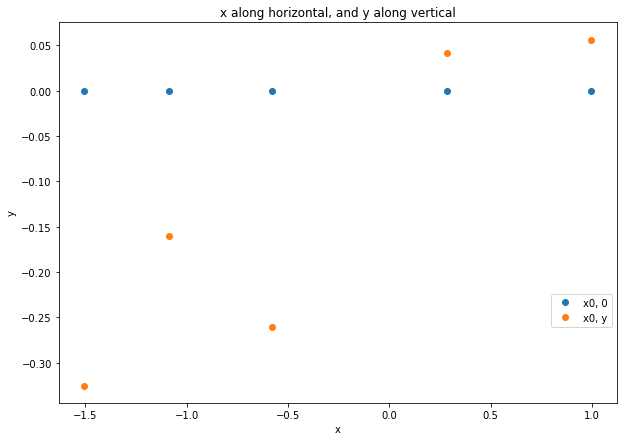

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib
import mylib
importlib.reload(mylib)
from mylib import plot_vector, zerov


N = 5
K = 1

beta_underlying = np.zeros((K,), dtype=np.float32)
beta_underlying.fill(0.3)
noise = 0.1

np.random.seed(123)
X = np.random.randn(N, K).astype(np.float32)
y = X.dot(beta_underlying) + np.random.randn(N) * noise

plt.figure(figsize=(10, 7))
plt.plot(X.reshape(N), np.zeros(N), 'o', label='x0, 0')
plt.plot(X.reshape(N), y, 'o', label='x0, y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x along horizontal, and y along vertical')
plt.legend(bbox_to_anchor=(1.0, 0.3))
plt.show()


Add line of best fit.  Here, the line of best fit is calculated using the inverse directly:

beta [ 0.18182514]


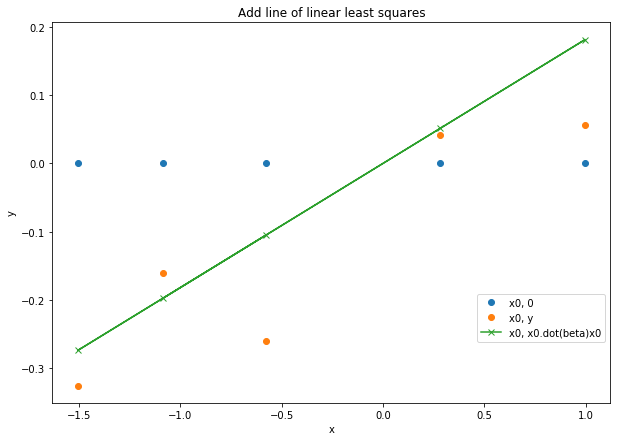

In [4]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta', beta)
plt.figure(figsize=(10, 7))
plt.plot(X.reshape(N), np.zeros(N), 'o', label='x0, 0')
plt.plot(X.reshape(N), y, 'o', label='x0, y')
plt.plot(X.reshape(N), X.dot(beta), 'x-', label='x0, x0.dot(beta)x0')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Add line of linear least squares')
plt.legend(bbox_to_anchor=(1.0, 0.3))
plt.show()


## Projection

### Projection onto $e_1, e_2$

Since the projection associated with linear least squares is in high dimensions, we cannot plot it in 2 dimensions directly.  This caused me to ponder, and procrastinate, and get stuck for, ... ages :-P

Finally I though, let's try projecting the high-dimensional vectors into lower-dimensional space?

Let's initially try naively projecting the $\mathbf{X}$ column vector, and the $\mathbf{y}$ vector, onto $(e_1, e_2)$:

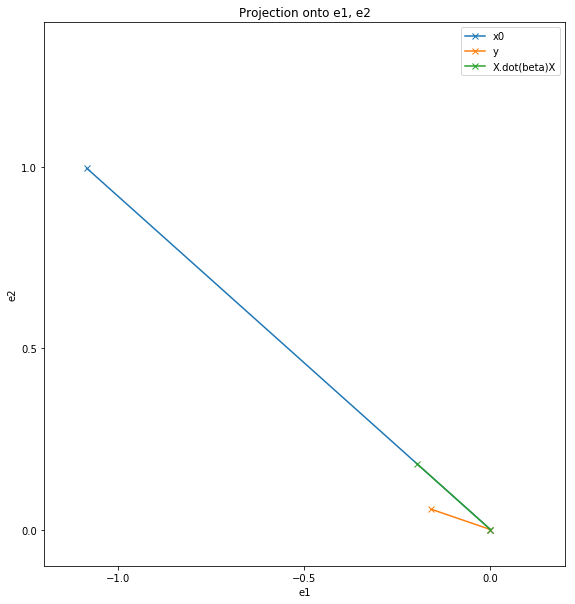

In [5]:
import mylib
import importlib
importlib.reload(mylib)

mylib.proportional_axes(xlim=[-1.2, 0.2], ylim=[-0.1, 1.4])
mylib.plot_vector(X.reshape(N)[:2], '-x', label='x0')
mylib.plot_vector(y.reshape(N)[:2], '-x', label='y')
mylib.plot_vector(X.dot(beta).reshape(N)[:2], '-x', label='X.dot(beta)X')
plt.title('Projection onto e1, e2')
plt.legend()
plt.xlabel('e1')
plt.ylabel('e2')
print('')
plt.show()

Of course, this projection is pretty rubbish, since neither $\mathbf{x}_{*,1}$ nor $\mathbf{y}$ lie in the projection plane.   Let's try projecting into a hyperplane containing both of them:

## Projection onto hyperplane through $\mathbf{x}_{*,1}$ and $\mathbf{y}$

Let's try projecting onto a hyperplane, $\mathbf{H}$ containing $\mathbf{x}_{*,1}$ and $\mathbf{y}$, where $\mathbf{x}_{*,1}$ is the first column vector of $\mathbf{X}$.

So, we want a projection $\mathbf{S}$, such that:

- any vector orthogonal to $\mathbf{H}$ hyperplane is also orthogonal to $\mathbf{x}_{*,1}$ and $\mathbf{y}$
- the projection of $\mathbf{X}_{*,1}$ and $\mathbf{y}$, ie $\mathbf{S}\mathbf{x}_{*,1}$ and $\mathbf{S}\mathbf{y}$ is orthogonal to any vector orthogonal to $\mathbf{H}$ hyperplane
- $\mathbf{S}\mathbf{x}_{*,1} \otimes \mathbf{S}\mathbf{y}$ should be orthogonal to $\mathbf{H}$
- $\mathbf{S}\mathbf{x}_{*,1} - \mathbf{x}_{*,1}$ should be orthogonal to $\mathbf{H}$
- $\mathbf{S}\mathbf{x}_{*,1} - \mathbf{x}_{*,1}$ should be orthogonal to $\mathbf{S}\mathbf{y}$
- vector orthogonal to $\mathbf{H}$ is $\mathbf{x}_{*,1} \otimes \mathbf{y}$

... but actually, what we want is an orthonormal basis for the hyperplane.  One vector will be:

$$
\mathbf{b}_1  = \frac{\mathbf{x}_{*,1}}{\lvert\mathbf{x}_{*,1}\rvert}
$$

The other vector will be:

$$
c\mathbf{b}_2 = \mathbf{y} - \mathrm{proj}_{[\mathbf{b}_1]}(\mathbf{y})
$$
&nbsp;

$$
c\mathbf{b}_2 = \mathbf{y} - \mathbf{y}^T \mathbf{b}_1\mathbf{y}
$$

(where $c$ is a normalizing scalar constant)


b0 [-0.49260056  0.4525415   0.12840036 -0.6834752  -0.26253754]
norm b0 1.0
y_proj_b0 [-0.19739494  0.18134247  0.0514526  -0.27388224 -0.10520407]
norm y_proj_b0 0.40072
norm b1_unnorm 0.20906382939
b1 [ 0.17625906 -0.5969792  -0.045203   -0.24591808 -0.74163978]
x0.dot(b1) -1.48077320183e-07
norm x0 2.20388
2.20388
norm y 0.451978179775
0.451978179775
norm b1 1.0
b0.dot(b1) -6.39584870066e-08
beta [ 0.18182514]
y_proj_basis[0] / X_proj_basis[0] 0.181825



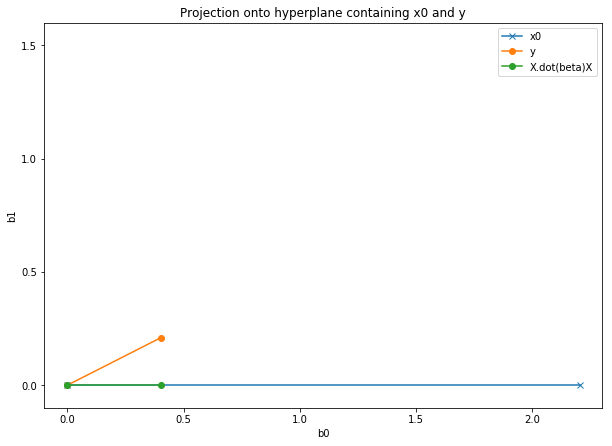

In [6]:
import mylib
import importlib
importlib.reload(mylib)

x0 = X[:, 0]
b0 = x0 / np.linalg.norm(x0)
print('b0', b0)
print('norm b0', np.linalg.norm(b0))

y_proj_b0 = y.dot(b0) * b0
print('y_proj_b0', y_proj_b0)
print('norm y_proj_b0', np.linalg.norm(y_proj_b0))
b1_unnorm = y - y_proj_b0
print('norm b1_unnorm', np.linalg.norm(b1_unnorm))
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)
print('b1', b1)

print('x0.dot(b1)', x0.dot(b1))

print('norm x0', np.linalg.norm(x0))
print(np.sqrt(np.sum(np.power(x0, 2))))
print('norm y', np.linalg.norm(y))
print(np.sqrt(np.sum(np.power(y, 2))))
print('norm b1', np.linalg.norm(b1))
print('b0.dot(b1)', b0.dot(b1))

def proj_ortho_basis(v, b0, b1):
    v = v.reshape(-1)
    b0 = b0.reshape(-1)
    b1 = b1.reshape(-1)
    x = v.dot(b0)
    y = v.dot(b1)
    proj = np.array([x, y], dtype=np.float32)
    return proj


def proj(v):
    return proj_ortho_basis(v, b0, b1)


X_proj_basis = proj(X)
y_proj_basis = proj(y)
print('beta', beta)
print('y_proj_basis[0] / X_proj_basis[0]', y_proj_basis[0] / X_proj_basis[0])

mylib.proportional_axes(xlim=[-0.1, 2.3], ylim=[-0.1, 1.6])
mylib.plot_vector(proj(X), formatstr='-x', label='x0')
mylib.plot_vector(proj(y), formatstr='-o', label='y')
mylib.plot_vector(proj(X.dot(beta)), formatstr='-o', label='X.dot(beta)X')
plt.legend()
plt.xlabel('b0')
plt.ylabel('b1')
plt.title('Projection onto hyperplane containing x0 and y')
print('')
plt.show()


What if we determine beta by projecting from $\mathbf{X}$ onto $\mathbf{y}$?

b0 [-0.3552064   0.12508504  0.09292991 -0.71971354 -0.57581125]
norm b0 1.0
x0_proj_y [-0.69405141  0.24440846  0.18157932 -1.40627589 -1.12509969]
norm x0_proj_y 1.95393835555
norm b1_unnorm 1.0194094504
b1 [-0.38412361  0.73860114  0.09946856 -0.09811449  0.53609417]
y.dot(b1) 1.11022302463e-16
norm x0 2.20388
2.20388
norm y 0.451978179775
0.451978179775
norm b1 1.0
b0.dot(b1) 2.22044604925e-16
y_proj_basis[0] / X_proj_basis[0] 0.231316


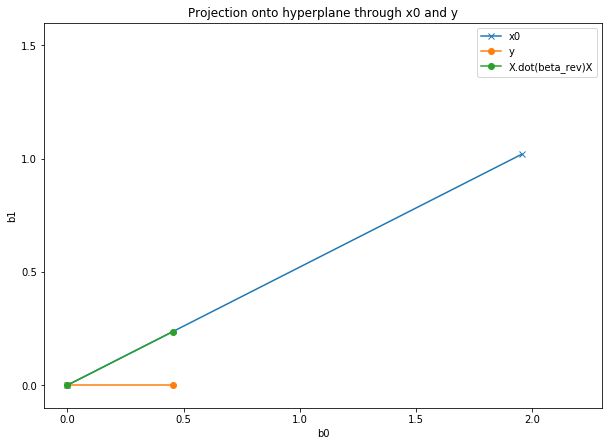

In [7]:
"""
This uses y/mod(y) as b_0, and projects from X onto y
"""

import mylib
import importlib
importlib.reload(mylib)

x0 = X[:, 0]

b0 = y / np.linalg.norm(y)
print('b0', b0)
print('norm b0', np.linalg.norm(b0))

x0_proj_y = x0.dot(y) / y.dot(y) * y
print('x0_proj_y', x0_proj_y)
print('norm x0_proj_y', np.linalg.norm(x0_proj_y))
b1_unnorm = x0 - x0_proj_y
print('norm b1_unnorm', np.linalg.norm(b1_unnorm))
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)
print('b1', b1)

print('y.dot(b1)', y.dot(b1))

print('norm x0', np.linalg.norm(x0))
print(np.sqrt(np.sum(np.power(x0, 2))))
print('norm y', np.linalg.norm(y))
print(np.sqrt(np.sum(np.power(y, 2))))
print('norm b1', np.linalg.norm(b1))
print('b0.dot(b1)', b0.dot(b1))


def proj(v):
    return mylib.proj_ortho_basis(v, b0, b1)


X_proj_basis = proj_ortho_basis(X, b0, b1)
y_proj_basis = proj_ortho_basis(y, b0, b1)
# print('beta', beta)
beta_rev = np.array([y_proj_basis[0] / X_proj_basis[0]], dtype=np.float32)
print('y_proj_basis[0] / X_proj_basis[0]', y_proj_basis[0] / X_proj_basis[0])

mylib.proportional_axes(xlim=[-0.1, 2.3], ylim=[-0.1, 1.6])
mylib.plot_vector(proj(X), formatstr='-x', label='x0')
mylib.plot_vector(proj(y), formatstr='-o', label='y')
mylib.plot_vector(proj(X.dot(beta_rev)), formatstr='-o', label='X.dot(beta_rev)X')
plt.legend()
plt.xlabel('b0')
plt.ylabel('b1')
plt.title('Projection onto hyperplane through x0 and y')
plt.show()


Plot the two corresponding lines of best fit:

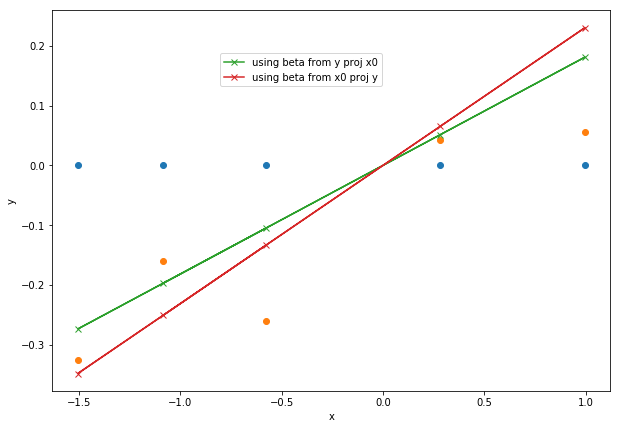

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(X.reshape(N), np.zeros(N), 'o')
plt.plot(X.reshape(N), y, 'o')
plt.plot(X.reshape(N), X.dot(beta), 'x-', label='using beta from y proj x0')
plt.plot(X.reshape(N), X.dot(beta_rev), 'x-', label='using beta from x0 proj y')
plt.legend(bbox_to_anchor=(0.6, 0.9))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Compare the losses:

In [9]:
loss = np.linalg.norm(y - X.dot(beta))
loss_rev = np.linalg.norm(y - X.dot(beta_rev))
print('beta', beta, 'loss', loss)
print('beta_rev', beta_rev, 'loss_rev', loss_rev)

beta [ 0.18182514] loss 0.209063833949
beta_rev [ 0.23131649] loss_rev 0.235806211733


Of course!  It starts to make sense to me now.  The shortest line from $\mathbf{y}$ to $\mathbf{x}_{*,1}$ will be perpendicular to $\mathbf{x}_{*,1}$, and not perpendicular to $\mathbf{y}$.  Since $\mathbf{y}$ is fixed, and the angle of $\mathbf{y}$ and $\mathbf{x}_{*,1}$ is fixed, so the only thing we can choose is: "from which part of the line $\mathbf{x}_{*,1}$ do we want to draw a line to the end of $\mathbf{y}$?"

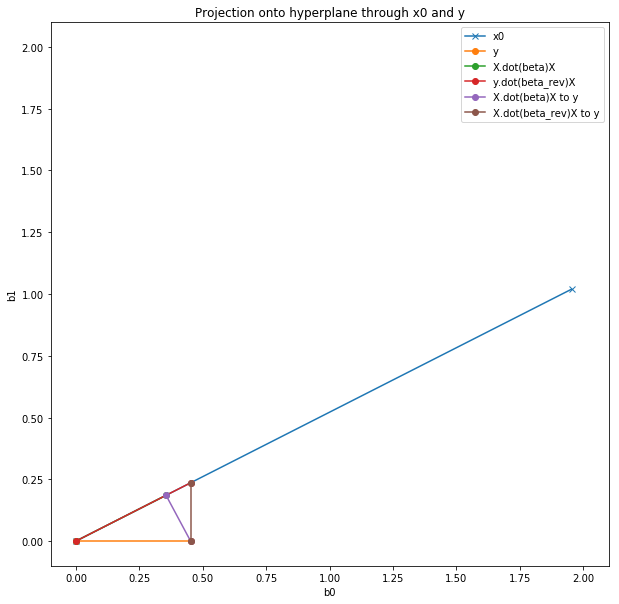

In [10]:
import mylib
import importlib
importlib.reload(mylib)

x0 = X[:, 0]

b0 = y / np.linalg.norm(y)

x0_proj_y = x0.dot(y) / y.dot(y) * y
b1_unnorm = x0 - x0_proj_y
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)

def proj(v):
    return mylib.proj_ortho_basis(v, b0, b1)

X_proj_basis = proj(X)
y_proj_basis = proj(y)

X_beta = X.dot(beta)
X_beta_rev = X.dot(beta_rev)

plt.figure(figsize=(10, 10))
mylib.plot_vector(X_proj_basis, formatstr='-x', label='x0')
mylib.plot_vector(y_proj_basis, formatstr='-o', label='y')
mylib.plot_vector(proj(X_beta), formatstr='-o', label='X.dot(beta)X')
mylib.plot_vector(proj(X_beta_rev), formatstr='-o', label='y.dot(beta_rev)X')
mylib.plot_vector(proj(X_beta), p1=proj(y), formatstr='-o', label='X.dot(beta)X to y')
mylib.plot_vector(proj(X_beta_rev), p1=proj(y), formatstr='-o', label='X.dot(beta_rev)X to y')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 2.1)
plt.xlabel('b0')
plt.ylabel('b1')
plt.legend()
print('')
plt.title('Projection onto hyperplane through x0 and y')
plt.show()

It is clear that since the residuals is the difference between $\mathbf{y}$ and some point on $\mathbf{x}_{*,1}$, then we should choose the closest point on $\mathbf{x}_{*,1}$, and that will be: the orthogonal projection of $\mathbf{y}$ onto $\mathbf{x}_{*,1}$.  Projecting the other way around, from $\mathbf{x}_{*,1}$ onto $\mathbf{y}$ is another line: and it's not the shortest line.

### Two features

Lets be ambitious, and try two features :-P  We will use `x1` in the code to denote the second column vector of $\mathbf{X}$.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib
import mylib
importlib.reload(mylib)
from mylib import plot_vector, zerov


N = 5
K = 2

beta_underlying = np.zeros((K,), dtype=np.float32)
beta_underlying.fill(0.3)
noise = 0.1

np.random.seed(123)
X = np.random.randn(N, K).astype(np.float32)
y = X.dot(beta_underlying) + np.random.randn(N) * noise
print('y', y)

print('X\n', X)
print('y\n', y)

y [-0.09437418 -0.37646578  0.47098986 -0.92056773  0.07536056]
X
 [[-1.08563066  0.99734545]
 [ 0.2829785  -1.50629473]
 [-0.57860023  1.65143657]
 [-2.42667913 -0.42891264]
 [ 1.26593626 -0.86674041]]
y
 [-0.09437418 -0.37646578  0.47098986 -0.92056773  0.07536056]


Now, we have three vectors, all in the same dimensional space as before, ie $N$ dimensions, where here $N$ is 5.  They are unlikely to be co-planar though.  What to do?  Presumably, we need to project everything into the plane containing the two $\mathbf{X}$ column vectors?

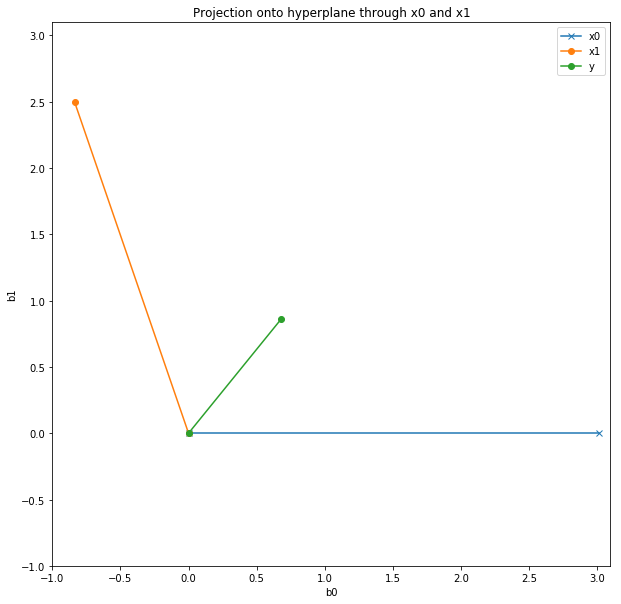

In [12]:
# lets use one of the x vectors as one basis vector, and then use the projection formula,
# using th eother x vector, to find the basis vector

x0 = X[:, 0]
x1 = X[:, 1]

b0 = x0 / np.linalg.norm(x0)
x1_proj_b0 = x1.dot(b0) * b0
b1_unnorm = x1 - x1_proj_b0
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)

def proj(v):
    return mylib.proj_ortho_basis(v, b0, b1)

plt.figure(figsize=(10, 10))
mylib.plot_vector(proj(x0), formatstr='-x', label='x0')
mylib.plot_vector(proj(x1), formatstr='-o', label='x1')
mylib.plot_vector(proj(y), formatstr='-o', label='y')
plt.xlim(-1, 3.1)
plt.ylim(-1, 3.1)
plt.xlabel('b0')
plt.ylabel('b1')
plt.legend()
plt.title('Projection onto hyperplane through x0 and x1')
print('')
plt.show()

In [13]:
# using the formula:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta', beta)

beta [ 0.32176245  0.34527784]


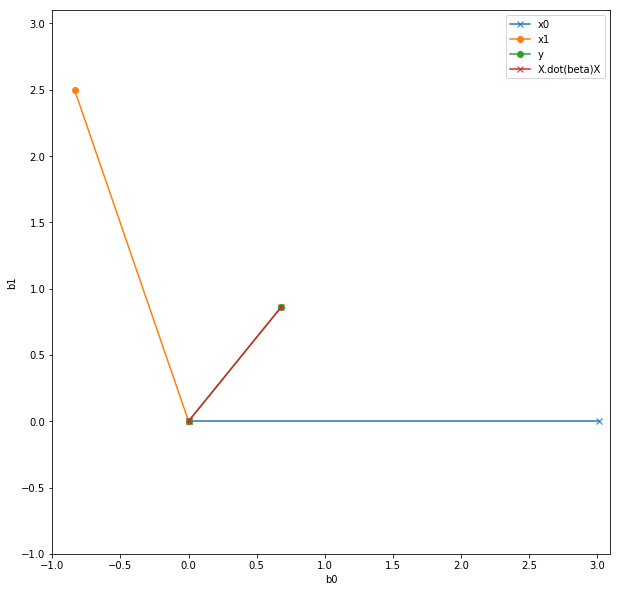

In [14]:
def proj(vec):
    return mylib.proj_ortho_basis(vec, b0, b1)

plt.figure(figsize=(10, 10))
mylib.plot_vector(proj(x0), formatstr='-x', label='x0')
mylib.plot_vector(proj(x1), formatstr='-o', label='x1')
mylib.plot_vector(proj(y), formatstr='-o', label='y')
mylib.plot_vector(proj(X.dot(beta)), formatstr='-x', label='X.dot(beta)X')
plt.xlim(-1, 3.1)
plt.ylim(-1, 3.1)
plt.xlabel('b0')
plt.ylabel('b1')
plt.legend()
plt.show()

$\mathbf{y}$ and $\mathbf{X}^T\beta\mathbf{X}$ coincide.  This makes sense I suppose:
    
- the shortest line from $\mathbf{y}$ to the hyperplane formed by $\mathbf{X}_{*,1}$ and $\mathbf{X}_{*,2}$ will be perpendicular to this hyperplane.  Otherwise its not the shortest line
- therefore the line from $\mathbf{y}$ is orthogonal to our projection plane, and therefore exactly coincides with where $\mathbf{y}$ appears, in our projection
- in our projection, we can move to any point in the projection plane, using the column vectors of $\mathbf{X}$. The only restriction is that we cant move into or out of the paper/picture/diagram.  Therefore, the shortest line from $\mathbf{y}$ to this plane will exactly correspond to the orthogonal projection of $\mathbf{y}$ onto this plane.

### Three features

What about 3 features? :-P

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib
import mylib
importlib.reload(mylib)
from mylib import plot_vector, zerov


N = 5
K = 3

beta_underlying = np.zeros((K,), dtype=np.float32)
beta_underlying.fill(0.3)
noise = 0.1

np.random.seed(123)
X = np.random.randn(N, K).astype(np.float32)
y = X.dot(beta_underlying) + np.random.randn(N) * noise

print('X\n', X)
print('y\n', y)

X
 [[-1.08563066  0.99734545  0.2829785 ]
 [-1.50629473 -0.57860023  1.65143657]
 [-2.42667913 -0.42891264  1.26593626]
 [-0.86674041 -0.67888618 -0.09470897]
 [ 1.49138963 -0.63890201 -0.44398195]]
y
 [ 0.01497286  0.09055549 -0.25821803 -0.39169533  0.16117035]


We can now form 3-dimensional basis space using the 3 column vectors of $\mathbf{X}$. And project onto those.

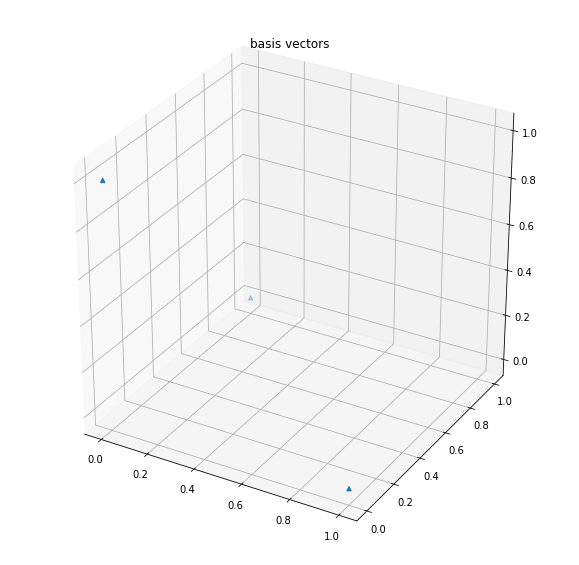

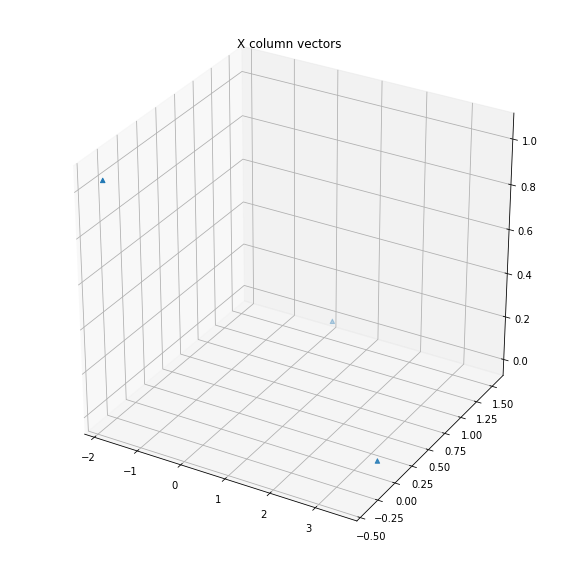

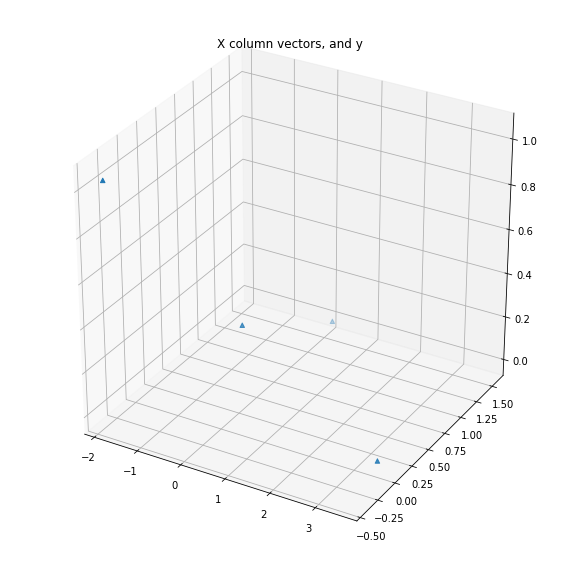

In [22]:
from mpl_toolkits.mplot3d import Axes3D


x0 = X[:, 0]
x1 = X[:, 1]
x2 = X[:, 2]

b0 = x0 / np.linalg.norm(x0)

x1_proj_b0 = x1.dot(b0) * b0
b1_unnorm = x1 - x1_proj_b0
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)

x2_proj_b0 = x2.dot(b0) * b0
x2_proj_b1 = x2.dot(b1) * b1
b2_unnorm = x2 - x2_proj_b0 - x2_proj_b1
b2 = b2_unnorm / np.linalg.norm(b2_unnorm)

def proj(v):
    global b0, b1, b2
    v = v.reshape(-1)
    b0 = b0.reshape(-1)
    b1 = b1.reshape(-1)
    b2 = b2.reshape(-1)
    x = v.dot(b0)
    y = v.dot(b1)
    z = v.dot(b2)
    proj = np.array([x, y, z], dtype=np.float32)
    return proj

def plot_vecs(vs):
    xs = []
    ys = []
    zs = []
    for v in vs:
        p = proj(v)
        xs.append(p[0])
        ys.append(p[1])
        zs.append(p[2])
    ax.scatter(xs, ys, zs, marker='^')

# plt.figure()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
plot_vecs([b0, b1, b2])
plt.title('basis vectors')
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
plot_vecs([x0, x1, x2])
plt.title('X column vectors')
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
plot_vecs([x0, x1, x2, y])
plt.title('X column vectors, and y')
plt.show()

This is a bit tricky to plot.  It might be possible to improve these plots a bit.  Note that the origin might not be quite where we think it is in the above plots.  At least, I thought it was in the centre, but its actually displaced somewhat.

In the case of three feature vectors, we cant really 'see' the perpendicular vector from the original $\mathbf{y}$ to the point of projection, where it "appears" in the column space of $\mathbf{X}$.  $\mathbf{y}$ is projected into this space along some higher dimensions, orthogonal to the 'visible' ones in these plots.  Using the basis vectors formed from the columnspace of $\mathbf{X}$, we can move freely throughout the 3d projection space, and so we will choose exactly the point where $\mathbf{y}$ is projected to, in this space.  For the projection of $\mathbf{y}$ into this space, we will choose the orthogonal projection, since it is the shortest path from wherever $\mathbf{y}$ is in high-dimensional space, into this 3-dimensional projection space.

The more features we have in $\mathbf{X}$, as long as they are linearly independent, the more dimensions we will have in the projection space spanned by these column vectors, and therefore the closer we can get to the real, unprojected, location of $\mathbf{y}$.  This makes sense, since more features lets us fit closer to the target data.

When the number of linearly independent columns in $\mathbf{X}$ equals the number of dimensions of $\mathbf{y}$, then we can fit the target data exactly. (ie when the number of columns of $\mathbf{X}$ equals the number of data points, the number of rows in $\mathbf{X}$ and the length of $\mathbf{y}$).

### Effect of hat matrix

The formula for beta is:

$$
\mathbf{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

And so the prediction for $\mathbf{y}$, let's call it $\mathbf{y}'$, is:

$$
\mathbf{y}' = \mathbf{X}\mathbf{\beta} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

$\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is sometimes termed the 'hat' matrix.  Let's denote this matrix $\mathbf{S}$.

From the form of $\mathbf{S}$, we can see it is a projection matrix, that projects into the space spanned by the column space of $\mathbf{X}$.

The residuals vector is:

$$
\mathbf{r} = \mathbf{y} - \mathbf{X}\beta
$$
&nbsp;

$$
= \mathbf{y} - \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$
&nbsp;

$$
= (\mathbf{I} - \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T)\mathbf{y}
$$
&nbsp;

$$
= (\mathbf{I} - \mathbf{S})\mathbf{y}
$$


Let's plot the various vectors under the projection $\mathbf{S}$, and see how they look.  Let's start with an $\mathbf{X}$ with one single column, from earlier.  Do we want to project into an orthonormal basis from $\mathbf{S}$?  Or at least a normalized basis?  Or simply whatever-$\mathbf{S}$-is?  Maybe try all three?

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib
import mylib
import scipy
importlib.reload(mylib)
from mylib import plot_vector, zerov


N = 5
K = 1

beta_underlying = np.zeros((K,), dtype=np.float32)
beta_underlying.fill(0.3)
noise = 0.1

np.random.seed(123)
X = np.random.randn(N, K).astype(np.float32)
y = X.dot(beta_underlying) + np.random.randn(N) * noise

S = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
print('S', S)

np.set_printoptions(suppress=True, precision=3)
print('S.T.dot(S)', S.T.dot(S))
print('S.dot(X)', S.dot(X))
print('np.linalg.det(S)', np.linalg.det(S))
Q, R = scipy.linalg.qr(S)
print('Q', Q)
print('R', R)

S [[ 0.243 -0.223 -0.063  0.337  0.129]
 [-0.223  0.205  0.058 -0.309 -0.119]
 [-0.063  0.058  0.016 -0.088 -0.034]
 [ 0.337 -0.309 -0.088  0.467  0.179]
 [ 0.129 -0.119 -0.034  0.179  0.069]]
S.T.dot(S) [[ 0.243 -0.223 -0.063  0.337  0.129]
 [-0.223  0.205  0.058 -0.309 -0.119]
 [-0.063  0.058  0.016 -0.088 -0.034]
 [ 0.337 -0.309 -0.088  0.467  0.179]
 [ 0.129 -0.119 -0.034  0.179  0.069]]
S.dot(X) [[-1.086]
 [ 0.997]
 [ 0.283]
 [-1.506]
 [-0.579]]
np.linalg.det(S) -4.74775e-35
Q [[-0.493 -0.737  0.447 -0.115  0.041]
 [ 0.453  0.223  0.764 -0.402 -0.012]
 [ 0.128 -0.172 -0.063 -0.041 -0.974]
 [-0.683  0.606  0.305  0.153 -0.224]
 [-0.263  0.106 -0.346 -0.894  0.007]]
R [[-0.493  0.453  0.128 -0.683 -0.263]
 [ 0.    -0.    -0.     0.     0.   ]
 [ 0.     0.     0.    -0.     0.   ]
 [ 0.     0.     0.    -0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]]


Its rank 1, as could be expected/predicted, since there is only one feature.  Though I might not have predicted it with much certainty :-P

So, it projects onto a space of dimension 1.  So, it projects onto a line.  Which again could be expected/predicted, but I might not have quite predicted this :-P

So, we just need one basis vector, which we can get by projecting anything we like, and normalizing it:

In [35]:
b0_unnorm = S.dot(np.array([1] * N, dtype=np.float32))
b0 = b0_unnorm / np.linalg.norm(b0_unnorm)
print('b0', b0)

b0 [ 0.493 -0.453 -0.128  0.683  0.263]


It is identical to the first column of $\mathbf{Q}$, just with the sign flipped. I'm not sure if I could have predicted it, but it seems interesting.

In [37]:
y_proj = S.dot(y)
x0 = X[:, 0]
x0_proj = S.dot(x0)

print('y_proj', y_proj)
print('x0_proj', x0_proj)

print('norm y_proj', np.linalg.norm(y_proj))
print('norm x0_proj', np.linalg.norm(x0_proj))

print('y_proj.dot(b0)', y_proj.dot(b0))
print('x0_proj.dot(b0)', x0_proj.dot(b0))


y_proj [-0.197  0.181  0.051 -0.274 -0.105]
x0_proj [-1.086  0.997  0.283 -1.506 -0.579]
norm y_proj 0.400720119123
norm x0_proj 2.20388
y_proj.dot(b0) -0.400720108273
x0_proj.dot(b0) -2.20388


The norm of the projected $\mathbf{y}$ and $\mathbf{x}_{*,1}$ match the value of their dot product with `b0`. That means they are co-linear with `b0`, as we expect.

Plotting the projection of $\mathbf{y}$ and $\mathbf{x}_{*,1}$ by $\mathbf{S}$ wont be very exciting: it's just the magnitude of their projection onto $\mathbf{x}_{*,1}$.  Let's check that `b0` and `x0` are co-linear:

In [41]:
print('norm x0', np.linalg.norm(x0))
print('x0.dot(b0)', x0.dot(b0))

norm x0 2.20388
x0.dot(b0) -2.20388


Identical (except for sign), so `b0` and `x0` are indeed colinear, and $\mathbf{S}$ is a projection onto `x0`.

What about if we have a 2-dimensional $\mathbf{X}$, ie two features?

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib
import mylib
importlib.reload(mylib)
from mylib import plot_vector, zerov


N = 5
K = 2

beta_underlying = np.zeros((K,), dtype=np.float32)
beta_underlying.fill(0.3)
noise = 0.1

np.random.seed(123)
X = np.random.randn(N, K).astype(np.float32)
x0 = X[:, 0]
x1 = X[:, 1]
y = X.dot(beta_underlying) + np.random.randn(N) * noise

S = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
print('S', S)

np.set_printoptions(suppress=True, precision=3)
print('S.T.dot(S)', S.T.dot(S))
print('S.dot(X)', S.dot(X))
print('np.linalg.det(S)', np.linalg.det(S))
Q, R = scipy.linalg.qr(S)
print('Q', Q)
print('R', R)

S [[ 0.208 -0.193  0.236  0.167 -0.209]
 [-0.193  0.336 -0.36   0.177  0.158]
 [ 0.236 -0.36   0.394 -0.109 -0.204]
 [ 0.167  0.177 -0.109  0.843 -0.247]
 [-0.209  0.158 -0.204 -0.247  0.219]]
S.T.dot(S) [[ 0.208 -0.193  0.236  0.167 -0.209]
 [-0.193  0.336 -0.36   0.177  0.158]
 [ 0.236 -0.36   0.394 -0.109 -0.204]
 [ 0.167  0.177 -0.109  0.843 -0.247]
 [-0.209  0.158 -0.204 -0.247  0.219]]
S.dot(X) [[-1.086  0.997]
 [ 0.283 -1.506]
 [-0.579  1.651]
 [-2.427 -0.429]
 [ 1.266 -0.867]]
np.linalg.det(S) 9.39194e-27
Q [[-0.456  0.    -0.54   0.69   0.157]
 [ 0.425 -0.395 -0.713 -0.201 -0.339]
 [-0.518  0.355 -0.379 -0.668  0.13 ]
 [-0.366 -0.842  0.155 -0.191  0.31 ]
 [ 0.459  0.094 -0.18  -0.035  0.865]]
R [[-0.456  0.425 -0.518 -0.366  0.459]
 [ 0.    -0.395  0.355 -0.842  0.094]
 [ 0.     0.     0.    -0.     0.   ]
 [ 0.     0.     0.     0.    -0.   ]
 [ 0.     0.     0.     0.    -0.   ]]


$\mathbf{R}$ has two non-zero rows now, so the rank of $\mathbf{S}$ is 2 now, I think.  Which makes sense, since the rank of $\mathbf{X}$ is 2, in the general case, with two feature columns.

This means we are projecting onto a plane.

Presumably we are projecting onto the hyperplane containing both `x0` and `x1`?

We can test by using the projection matrix against `x0` and `x1`.  And we'd expect them to be unchanged.  I think.

In [43]:
print('x0', x0)
print('x1', x1)
print('S.dot(x0)', S.dot(x0))
print('S.dot(x1)', S.dot(x1))


x0 [-1.086  0.283 -0.579 -2.427  1.266]
x1 [ 0.997 -1.506  1.651 -0.429 -0.867]
S.dot(x0) [-1.086  0.283 -0.579 -2.427  1.266]
S.dot(x1) [ 0.997 -1.506  1.651 -0.429 -0.867]


Unchanged, as predicted, so the projection matrix $\mathbf{S}$ projects onto the plane containing both `x0` and `x1`.

Let's get the Eigenvectors of $\mathbf{S}$:

In [44]:
W, V = np.linalg.eig(S)
print('W', W)
print('V', V)

W [ 1.  1. -0. -0.  0.]
V [[ 0.399 -0.291  0.424 -0.681  0.206]
 [-0.563 -0.032 -0.576 -0.634  0.284]
 [ 0.625 -0.058 -0.509 -0.237  0.563]
 [-0.086 -0.882  0.108  0.173  0.185]
 [-0.356  0.365  0.467 -0.218  0.725]]


Are the two first eigenvectors orthogonal?

In [45]:
print(V[:, 0].dot(V[:, 1]))

-0.188774


No

Angle?

In [47]:
print(math.acos(V[:, 0].dot(V[:, 1])) * 180 / 3.1416)

100.88098490723992


Presumably these eigenvectors are co-linear with `x0` and `x1`? (otherwise applying $\mathbf{S}$ to either of them would likely change their angle I think?)

In [50]:
print('norm x0', np.linalg.norm(x0))
print('norm x1', np.linalg.norm(x1))
print('norm v0', np.linalg.norm(V[:, 0]))
print('norm v1', np.linalg.norm(V[:, 1]))

print('x0.dot(v0)', x0.dot(V[:, 0]))
print('x0.dot(v1)', x0.dot(V[:, 1]))
print('x1.dot(v0)', x1.dot(V[:, 0]))
print('x1.dot(v1)', x1.dot(V[:, 1]))


norm x0 3.0141
norm x1 2.63174
norm v0 1.0
norm v1 1.0
x0.dot(v0) -1.19514
x0.dot(v1) 2.94289
x1.dot(v0) 2.6224
x1.dot(v1) -0.277414


No.  So, now that I think about it, every vector lieing on the hyperplane containing `x0` and `x1` will be invariant wrt $\mathbf{S}$, since they are already in the range of $\mathbf{S}$, and projection is idempotent, $\mathbf{S}\mathbf{S} = \mathbf{S}$

Looking at:
    
$$
(\mathbf{I} - \mathbf{S})\mathbf{y}
$$

... this is a vector orthogonal to the vector space spanned by the hyperplane defined by the image of $\mathbf{S}$, which is also the vector space spanned by the column space of $\mathbf{X}$.  It should probably have $N - K$ dimensions.

If we parameterize this with $\alpha$, as in:

$$
\alpha(\mathbf{I} - \mathbf{S})\mathbf{y}
$$

... then we can adjust how far this vector moves between the original $\mathbf{y}$ and the projection of $\mathbf{y}$ into the subspace spanned by $\mathbf{X}$.  If we subtract this from $\mathbf{y}$, we should have a vector that varies between $\mathbf{y}$ and the projected $\mathbf{y}$, according to $\alpha$.  This gives:

$$
\mathbf{y} - \alpha(\mathbf{I} - \mathbf{S})\mathbf{y}
$$
&nbsp;

$$
=
((1 - \alpha)\mathbf{I} + \alpha\mathbf{S})\mathbf{y}
$$

Varying the constant of proportionality wont change the direction of the vector, so we can divide through by $\alpha$, and rearrange slightly, giving:

$$
\propto
\left( \mathbf{S} + \frac{1 - \alpha}{\alpha}\mathbf{I} \right)\mathbf{y}
$$
&nbsp;

$$
=
\left(
\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T + \frac{1 - \alpha}{\alpha}\mathbf{I}
\right)
\mathbf{y}
$$

Comparing these equations with the exponential term of the posterior IBP likelihood in Griffiths, ie:

$$
\mathbf{X}^T(\mathbf{I} - \mathbf{Z}(\mathbf{Z}^T + \frac{\sigma_X^2}{\sigma_A^2}\mathbf{I})^{-1}\mathbf{Z}^T)\mathbf{X}
$$

... it looks like the part:

$$
(\mathbf{I} - \mathbf{Z}(\mathbf{Z}^T\mathbf{Z})^{-1}\mathbf{Z}^T\mathbf{X}
$$

... resembles somewhat the residuals vector, although in this case its a matrix, not a vector.

This part:

$$
\mathbf{Z}(\mathbf{Z}^T\mathbf{Z} + \frac{\sigma_X^2}{\sigma_A^2}\mathbf{I})^{-1}\mathbf{Z}^T
$$

... I was hoping to resemble the parameterized term in $\alpha$ above, but couldnt quite see how to do that yet.

I kind of suspect that to go further, one potentially fruitful option could be to work through Minka's paper, the one cited by Griffiths at this juncture?  ie: "Bayesian linear regression", Minka, 2000.